In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from astropy.coordinates import SkyCoord
import astropy.units as u
from astroquery.gaia import Gaia

# class one, brown dwarf object
class BrownDwarf(object):
    def __init__(self, name, ra, dec, distance, color='black', temp = False):
        """
        Brown dwarf object

        Args:
            name (str): Name of object
            ra (float): RA, degrees
            dec (float) : Dec, degrees
            distance (float) : distance from (sun/earth?), pc
            color (str, optional) : mpl supported color to plot object in
            temp (float, optional) : object temperature, K. 
                    Used to plot object color based on temp

        """
        self.name = name
        self.ra = ra * u.deg
        self.dec = dec * u.deg
        self.distance = distance * u.pc

        if color:
            self.color = color
        if temp:
            self.temp = temp
        
        self.pos=SkyCoord(ra=self.ra,dec=self.dec, distance=self.distance,  frame='icrs')


    def get_xyz(self):
        """
        compute galactic cartesian coordinates for object
        [note, idk what else should go in this? no returns or args?]
        """
        # set set the x,y z attributes of the object
        gal=self.pos.transform_to('galactic')
        self.x = gal.cartesian.x.to(u.pc).value
        self.y = gal.cartesian.y.to(u.pc).value
        self.z = gal.cartesian.z.to(u.pc).value

# class 2, plot 3d
class Plot3D:
    def __init__(self, plotstars = False): # initlize the plot
        """
        Plotting in 3d
        """
        #: list : Doc comment *before* attribute, with type specified
        self.objects = [] # list of objects to keep track of on the plot
        self.fig = plt.figure(figsize=(8, 6))
        self.ax = self.fig.add_subplot(111, projection='3d')
        self._setup_plot() # set up method for putting the sun, labels, and initilize viewing angle

        if plotstars:
            self.plot_stars() # pass catalog through here?

    def _setup_plot(self):
        '''
        Setup plot with axis limits and labels. Plot the Sun at (0,0,0)
        '''
        self.ax.set_title("3D Galactic Plot (Sun at 0,0,0)")
        self.ax.set_xlabel("X (pc)")
        self.ax.set_ylabel("Y (pc)")
        self.ax.set_zlabel("Z (pc)")
        self.ax.set_xlim(-10,10)
        self.ax.set_ylim(-10,10)
        self.ax.set_zlim(-10,10)
        self.ax.scatter(0, 0, 0, color='orange', label='Sun')
        self.ax.legend()
        self.ax.view_init(elev=0, azim=125)
        plt.show()

    def plot_stars(self, catalog = 'Gaia'): # method for if we want to query simbad or gaia and plot stars on there
        """ Plot selection of Milky Way stars
        Args:
            catalog (str) : catalog to query stars from. Default is Gaia
        """
        if catalog == 'Gaia':
            query = """
                        SELECT TOP 1000 source_id, ra, dec, l, b, phot_g_mean_mag
                        FROM gaiadr3.gaia_source
                        WHERE phot_g_mean_mag < 12
                        """
            job = Gaia.launch_job_async(query)
            results = job.get_results()
            l = results['l']
            b = results['b']
            stars = SkyCoord(l=l, b=b, frame='galactic')
            self.ax.scatter(stars.cartesian.x, stars.cartesian.y, stars.cartesian.z, 
                            color = 'black', alpha = 0.005, marker = ',')
        
    def add_object(self, obj, show_label=True):
        """ Add new object to plot. Prints object coordinates
        Args:
            obj (object) : Brown Dwarf object[?]
        """
        self.objects.append(obj) 
        obj.get_xyz() # get the x,y and z of object. Note obj must have been initalized as BrownDwarf for this to work

        if hasattr(obj, 'temp'):
            norm = mcolors.Normalize(vmin=200, vmax=2500)
            cmap = cm.Reds
            color = cmap(norm(obj.temp))
            obj.color = color

        self.ax.scatter(obj.x, obj.y, obj.z, color=obj.color, label=obj.name)
        if show_label:
            self.ax.text(obj.x, obj.y, obj.z, f" {obj.name}", color=obj.color)
        self.ax.legend()
        self.fig.canvas.draw()
        print(f"Added: {obj.name} at (x={obj.x:.1f}, y={obj.y:.1f}, z={obj.z:.1f}) pc")


In [17]:
%matplotlib widget

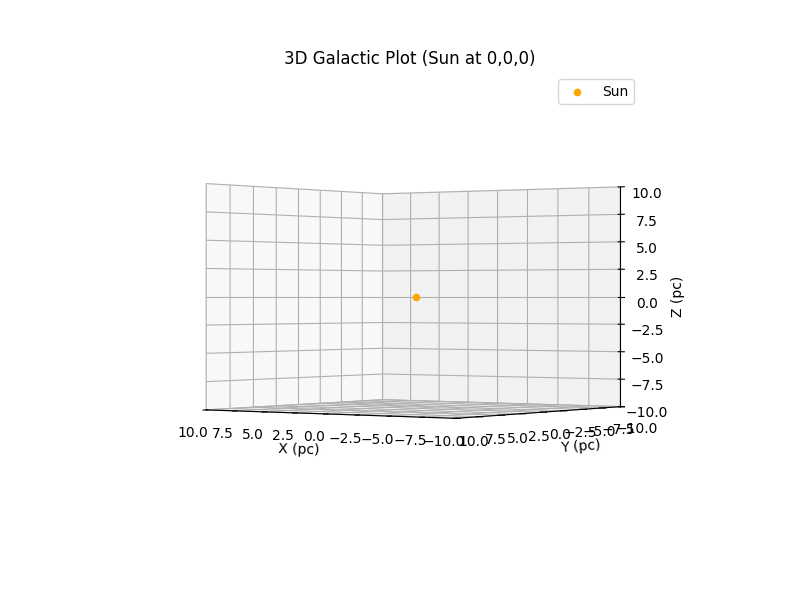

Added: mybd at (x=0.5, y=-1.9, z=0.2) pc
Added: mybd2 at (x=-2.6, y=1.2, z=4.1) pc
Added: mybd3 at (x=-4.1, y=6.3, z=2.8) pc
Added: mybd4 at (x=-3.1, y=-0.8, z=-2.4) pc


In [42]:
bd=BrownDwarf('mybd', 162,-53,2, temp = 2000)
bd2=BrownDwarf('mybd2', 162,53,5, temp = 200)
bd3=BrownDwarf('mybd3', 16,83,8, temp = 800)
bd4=BrownDwarf('mybd4', 62,-3,4, temp = 1200)
plot = Plot3D()
plot.add_object(bd)
plot.add_object(bd2)
plot.add_object(bd3)
plot.add_object(bd4)